# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788
import numpy as np
from neuronunit.tests.target_spike_current import SpikeCountSearch
from neuronunit.optimization.optimization_management import inject_model_soma



test


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    print(fitnesses)
    return obs_preds,opt,target,hall_of_fame,cell_evaluator


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


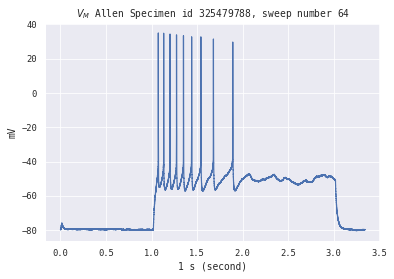

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen 325479788

In [4]:
efel_filter_iterable = {
    "ISI_log_slope":None,
    "mean_frequency":None,
    "adaptation_index2":None,
    "first_isi":None,
    "ISI_CV":None,
    "median_isi":None,
    "Spikecount":None,
    "all_ISI_values":None,
    "ISI_values":None,
    "time_to_first_spike":None,
    "time_to_last_spike":None,
    "time_to_second_spike":None,
    "extra_tests":{"var_expl":suite.traces["vm_soma"],"vmr":qt.mV}
    }
obs_preds,opt,target,hall_of_fame,cell_evaluator = test_opt_relative_diff(specimen_id = 325479788,model_type="IZHI",efel_filter_iterable=efel_filter_iterable)


gen	nevals	avg    	std    	min    	max  
1  	150   	7350.88	7049.07	295.698	19000


2  	141   	6964.96	6746.94	295.698	19000
3  	54    	3990.29	4519.96	295.698	19000
4  	56    	3750.9 	4220.58	295.698	19000
5  	52    	4809.04	5575.01	263.183	19000
6  	59    	3081.71	5499.59	140.762	19000
7  	60    	2212.15	4504.9 	61.3865	19000
8  	59    	1582.44	4620.25	61.3865	19000
9  	59    	1783.62	5145.97	57.132 	19000
10 	58    	690.395	2941.35	16.7579	19000
11 	58    	776.846	3364.61	14.1295	19000
12 	58    	450.587	2409.42	9.9304 	19000
13 	56    	566.251	2935.29	9.9304 	19000
14 	56    	410.083	2439.5 	9.9304 	19000
15 	52    	287.877	1762.16	9.7198 	19000
16 	55    	278.335	1765.63	6.90047	19000
17 	56    	236.834	1758.25	6.90047	19000
18 	53    	412.421	2441.09	6.90047	19000
19 	49    	221.708	1712.65	6.90047	19000
20 	56    	391.81 	2411.89	6.90047	19000
21 	57    	204.758	747.731	6.90047	4844.99
22 	58    	396.563	2409.6 	6.90047	19000  
23 	58    	90.4008	231.972	5.05571	1263.44
24 	59    	180.156	335.06 	5.05571	1442.29
25 	51    	167.145	597.536	5.05571	4633.41
26 	58

194	35    	81.7929	448.635	1.46522	4594.79
195	36    	182.814	1712.12	1.46522	19000  
196	25    	10.8599	34.1826	1.46522	298.865
197	33    	64.1668	209.039	1.46522	1382.52
198	30    	58.3114	124.952	1.46522	1306.37
199	34    	89.9961	419.427	1.46522	4591.82
200	35    	65.4637	153.236	1.46522	1572.65
201	35    	41.7904	116.786	1.46522	1243.76
202	31    	80.5212	421.443	1.46522	4652.84
203	30    	285.643	1809.36	1.46522	19000  
204	29    	65.9597	437.084	1.46522	4816.3 
205	28    	235.206	1758.87	1.46522	19000  
206	31    	22.0893	49.7269	1.46522	510.672
207	26    	39.129 	74.5638	1.46522	805.986
208	30    	302.256	1800.07	1.46522	19000  
209	18    	13.6393	37.3609	1.46522	392.852
210	36    	91.0825	430.183	1.46522	4594.79
211	30    	46.5383	120.03 	1.46522	1287.01
212	31    	223.802	1718.86	1.46522	19000  
213	36    	92.0994	583.288	1.46522	4579.76
214	41    	63.199 	228.229	1.28434	1537.29
215	39    	53.7642	170.171	1.28434	1301.53
216	27    	196.519	1710.67	1.28434	19000  
217	31    	


[124.1842563465546, 1.466635973296393, -65.3390600617959, -44.496171385488374, 48.690549999868814, 0.01064715322325316, 11.036512622260842, -55.79542123705071, -11.146777871323664, 6.706690983410536] the gene
1.2843400000000003


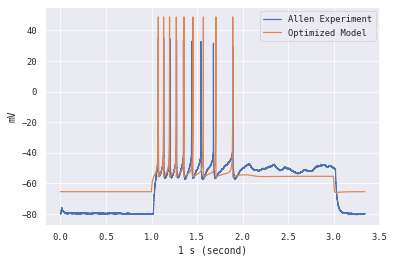

In [5]:

check_bin_vm_soma(target,opt)

In [8]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.488519,Relative Difference = 0.00
1,mean_frequency,10.086294,10.087424,Relative Difference = 0.00
2,adaptation_index2,0.091943,0.086568,Relative Difference = 0.01
3,ISI_CV,0.476055,0.384977,Relative Difference = 0.09
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,102.212500,Relative Difference = 0.00
6,ISI_values,108.400000,108.500000,Relative Difference = 0.10
7,time_to_first_spike,74.600000,74.500000,Relative Difference = 0.10
8,time_to_last_spike,892.300000,892.200000,Relative Difference = 0.10
9,time_to_second_spike,133.500000,132.700000,Relative Difference = 0.80
